In [4]:
import pandas as pd
import shapely.wkt
import numpy as np
import matplotlib.pyplot as plt

In [19]:
labels_path = '/home/lxhfirenking/work/cs231n/project/data/Vegas_8bit_256_val_poly/output.csv'

In [20]:
labels = pd.read_csv(labels_path)

In [21]:
labels.columns

Index(['ImageId', 'BuildingId', 'PolygonWKT_Pix', 'Confidence'], dtype='object')

In [22]:
len(labels)

31843

In [23]:
polygon_areas = []
for i in range(len(labels)):
    polygon_wkt = labels.loc[i, 'PolygonWKT_Pix']
    polygon = shapely.wkt.loads(polygon_wkt)
    if polygon.area > 1:
        polygon_areas.append(polygon.area)

In [7]:
np.savetxt("val_area.csv", polygon_areas, delimiter=",")

In [24]:
len(polygon_areas) # actual number of buildings with area greater than 1 

30934

In [25]:
np.mean(polygon_areas)

2174.5469817928965

In [26]:
np.median(polygon_areas)

1545.8389500000003

In [27]:
np.min(polygon_areas)

1.0027500000000091

In [28]:
np.max(polygon_areas)

65536.0

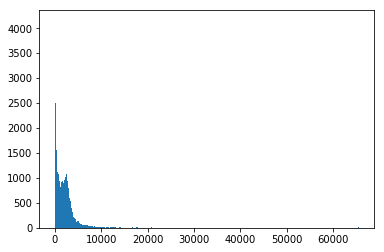

In [29]:
plt.hist(polygon_areas, bins='auto')
plt.show()

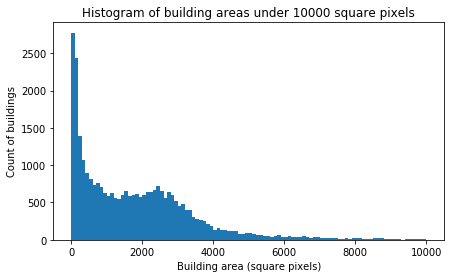

In [30]:
plt.figure(figsize=(7,4))
plt.hist(polygon_areas, bins=100, range=(0, 10000))
plt.title('Histogram of building areas under 10000 square pixels')
plt.ylabel('Count of buildings')
plt.xlabel('Building area (square pixels)')
plt.show()

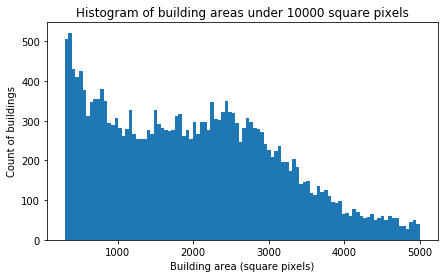

In [41]:
plt.figure(figsize=(7,4))
plt.hist(polygon_areas, bins=100, range=(300, 5000))
plt.title('Histogram of building areas under 10000 square pixels')
plt.ylabel('Count of buildings')
plt.xlabel('Building area (square pixels)')
plt.show()

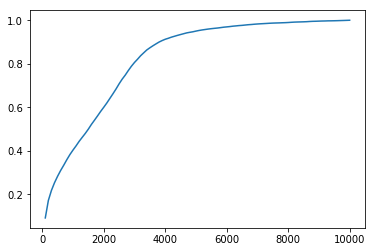

In [31]:
num_bins = 100
counts, bin_edges = np.histogram(polygon_areas, bins=num_bins, density=False, range=(0, 10000))
cdf = np.cumsum(counts)
plt.plot(bin_edges[1:], cdf/cdf[-1])
plt.show()

In [32]:
counts

array([2775, 2440, 1396, 1073,  901,  812,  730,  766,  713,  626,  587,
        629,  560,  548,  601,  658,  591,  602,  618,  576,  594,  646,
        644,  667,  717,  655,  566,  639,  596,  526,  456,  486,  404,
        399,  303,  283,  265,  256,  207,  182,  136,  155,  126,  127,
        117,  115,  115,   79,   74,   96,   87,   73,   63,   62,   53,
         47,   43,   56,   59,   43,   44,   55,   40,   44,   31,   45,
         44,   30,   40,   33,   28,   23,   25,   27,   21,   15,   12,
         18,   15,   22,   30,   25,   16,   12,   14,   18,   29,   22,
         10,   17,   14,    9,   16,    4,    9,   11,   15,   13,   16,
         16])

In [33]:
num_bins = 6
counts, bin_edges = np.histogram(polygon_areas, bins=num_bins, density=False, range=(0, 600))
cdf = np.cumsum(counts)

In [34]:
bin_edges

array([  0., 100., 200., 300., 400., 500., 600.])

In [35]:
counts

array([2775, 2440, 1396, 1073,  901,  812])

In [36]:
cdf

array([2775, 5215, 6611, 7684, 8585, 9397])

In the validation set, there are 6611 building polygons out of a total of 30934 that have area less than 300 squared pixels.

### What is the distribution of true positive's corresponding ground truth polygon areas, by our 1:1:1 weights model (complex)?
This is the first architecture we tried, not the base or simpler one.

polygon size 300

In [49]:
path_to_areas = '/home/lxhfirenking/work/cs231n/project/data/Vegas_8bit_256_val_poly/per_image_results/result_cp19_unetv2_equal_weights_true_pos_areas.csv'

In [50]:
true_pos_areas = np.genfromtxt(path_to_areas, delimiter=',')

In [51]:
len(true_pos_areas)  # this is the number of true positives

20270

In [52]:
np.min(true_pos_areas)

290.6911000000003

In [53]:
np.max(true_pos_areas)

65536.0

In [54]:
np.mean(true_pos_areas)

3019.367736279303

In [55]:
np.median(true_pos_areas)

2351.1863249999997

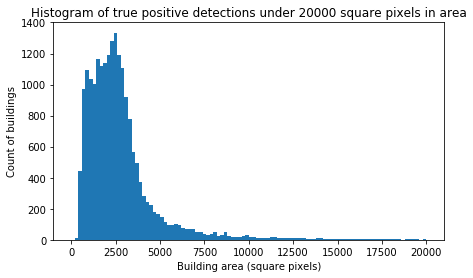

In [56]:
plt.figure(figsize=(7,4))
plt.hist(true_pos_areas, bins=100, range=(0, 20000))
plt.title('Histogram of true positive detections under 20000 square pixels in area')
plt.ylabel('Count of buildings')
plt.xlabel('Building area (square pixels)')
plt.show()

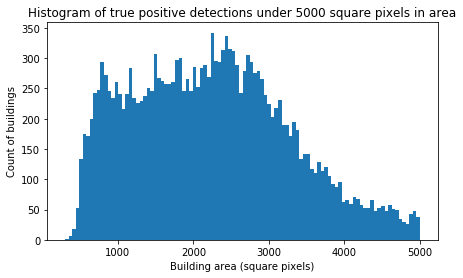

In [57]:
plt.figure(figsize=(7,4))
plt.hist(true_pos_areas, bins=100, range=(300, 5000))
plt.title('Histogram of true positive detections under 5000 square pixels in area')
plt.ylabel('Count of buildings')
plt.xlabel('Building area (square pixels)')
plt.show()

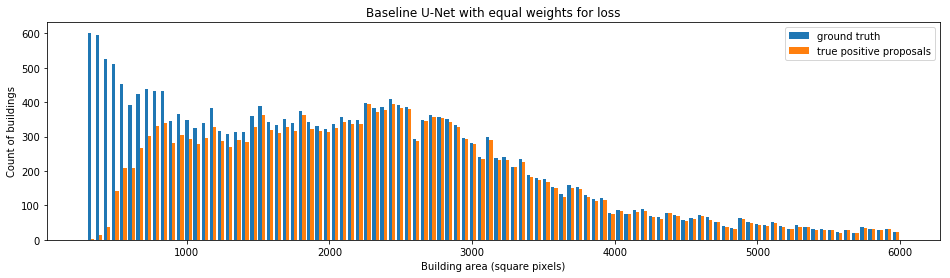

In [93]:
fig = plt.figure(figsize=(16,4))

lists = [polygon_areas, true_pos_areas]

plt.hist(lists, bins=100, range=(300, 6000), label=['ground truth', 'true positive proposals'])
plt.title('Baseline U-Net with equal weights for loss')
plt.ylabel('Count of buildings')
plt.xlabel('Building area (square pixels)')
plt.legend()
plt.show()

In [94]:
fig.savefig('./figures/unet_large_equal_weights_building_area.png', dpi=200)

### What about using the bse model with building-emphasizing weights (current best)?

In [69]:
# proposal file: proposal_cp14_base_interior_weights.csv
path_to_areas2 = '/home/lxhfirenking/work/cs231n/project/data/Vegas_8bit_256_val_poly/per_image_results/result_cp14_base_interior_weights_true_pos_areas.csv'

In [70]:
true_pos_areas2 = np.genfromtxt(path_to_areas2, delimiter=',')

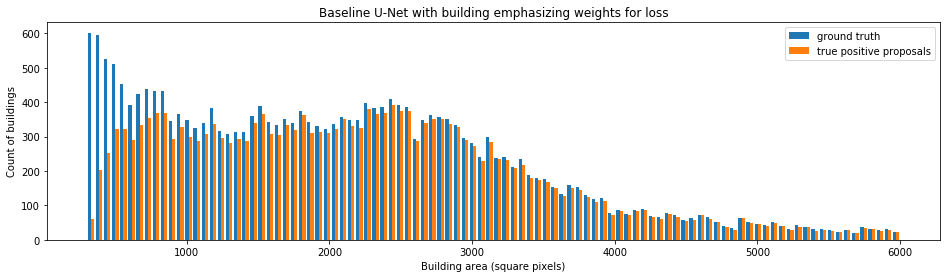

In [91]:
fig = plt.figure(figsize=(16,4))

lists = [polygon_areas, true_pos_areas2]

plt.hist(lists, bins=100, range=(300, 6000), label=['ground truth', 'true positive proposals'])
plt.title('Baseline U-Net with building emphasizing weights for loss')
plt.ylabel('Count of buildings')
plt.xlabel('Building area (square pixels)')
plt.legend()
plt.show()

In [92]:
fig.savefig('./figures/unet_base_buiding_emph_weights_building_area.png', dpi=200)